<a href="https://colab.research.google.com/github/marilynle/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module2-sampling-confidence-intervals-and-hypothesis-testing/Marilyn_Landim_Esko_LS_DSPT3_132_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy


In [2]:
# Loading the data
  !wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
    

--2019-10-05 05:06:45--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2019-10-05 05:06:50 (287 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [3]:
# Adding a header row and cleaning the data
df = pd.read_csv('house-votes-84.data',
               header=None,
               names=['class_name','handicapped_infants','water_project',
                        'budget_resolution','physician_fee_freeze', 'el_salvador_aid',
                        'religious_groups_in_schools','anti_satellite_test_ban',
                        'aid_to_nicaraguan_contras','mx_missile','immigration',
                        'synfuels_corporation_cutback', 'education_spending', 'superfund_right_to_sue','crime','duty_free_exports',
                        'export_administration_act_south_africa'])
df = df.replace({'?':float(0),'n':float(0),'y':float(1)})
df.sample(10)


,class_name,handicapped_infants,water_project,budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
254,democrat,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
230,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
193,democrat,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
265,democrat,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
47,democrat,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
272,democrat,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
98,democrat,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
249,democrat,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


In [4]:
df.describe()


,handicapped_infants,water_project,budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,0.429885,0.448276,0.581609,0.406897,0.487356,0.625287,0.549425,0.556322,0.475862,0.496552,0.344828,0.393103,0.480460,0.570115,0.400000,0.618391
std,0.495630,0.497890,0.493863,0.491821,0.500416,0.484606,0.498124,0.497390,0.499992,0.500564,0.475859,0.489002,0.500193,0.495630,0.490462,0.486341
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
# Confidence Intervals:
#1 Generate and numerically represent a confidence interval

In [0]:
# The samples
df_democrat = df[df['class_name'] == 'democrat']
df_republican = df[df['class_name'] == 'republican']


In [7]:
df_democrat.shape


(267, 17)

In [8]:
df_republican.shape


(168, 17)

In [0]:
issues =['handicapped_infants','water_project',
                        'budget_resolution','physician_fee_freeze', 'el_salvador_aid',
                        'religious_groups_in_schools','anti_satellite_test_ban',
                        'aid_to_nicaraguan_contras','mx_missile','immigration',
                        'synfuels_corporation_cutback', 'education_spending', 'superfund_right_to_sue','crime','duty_free_exports',
                        'export_administration_act_south_africa']


In [0]:
from scipy.stats import sem, t
from numpy import mean

def confidence_interval(x,ci): # ci = 0.95
  
  M = np.mean(x)                                   # Sample mean
  ME = sem(x)* t.ppf((1 + ci) / 2, len(x) - 1)     # Margin of error
  
  ci_endpoints = {   
      
          'The lower endpoint of the 95% CI is:': M - ME,
          'The upper endpoint of the 95% CI is:': M + ME 
  }
  return ci_endpoints 
      

In [11]:
# Democrats
for issue in issues: # calling the function for each issue  
    print("") 
    print(issue)
    print(confidence_interval(df_democrat[issue],0.95))
    


handicapped_infants
{'The lower endpoint of the 95% CI is:': 0.5247719472369563, 'The upper endpoint of the 95% CI is:': 0.6437673786057403}

water_project
{'The lower endpoint of the 95% CI is:': 0.3893864348338393, 'The upper endpoint of the 95% CI is:': 0.5094899696605427}

budget_resolution
{'The lower endpoint of the 95% CI is:': 0.8239366017405851, 'The upper endpoint of the 95% CI is:': 0.9064004769111003}

physician_fee_freeze
{'The lower endpoint of the 95% CI is:': 0.025525257217451757, 'The upper endpoint of the 95% CI is:': 0.07934365664022615}

el_salvador_aid
{'The lower endpoint of the 95% CI is:': 0.1571693613158776, 'The upper endpoint of the 95% CI is:': 0.25481565741071416}

religious_groups_in_schools
{'The lower endpoint of the 95% CI is:': 0.40049996006382055, 'The upper endpoint of the 95% CI is:': 0.5208483545429211}

anti_satellite_test_ban
{'The lower endpoint of the 95% CI is:': 0.6967242507786483, 'The upper endpoint of the 95% CI is:': 0.8014030900453218}


In [12]:
# Republicans
for issue in issues: # calling the function for each issue  
    print("") 
    print(issue)
    print(confidence_interval(df_republican[issue],0.95))
    
    


handicapped_infants
{'The lower endpoint of the 95% CI is:': 0.12526125471665267, 'The upper endpoint of the 95% CI is:': 0.2437863643309664}

water_project
{'The lower endpoint of the 95% CI is:': 0.37048144515554093, 'The upper endpoint of the 95% CI is:': 0.522375697701602}

budget_resolution
{'The lower endpoint of the 95% CI is:': 0.07941444662385228, 'The upper endpoint of the 95% CI is:': 0.18249031528090964}

physician_fee_freeze
{'The lower endpoint of the 95% CI is:': 0.9442772968863529, 'The upper endpoint of the 95% CI is:': 0.9961988935898376}

el_salvador_aid
{'The lower endpoint of the 95% CI is:': 0.8967330684696345, 'The upper endpoint of the 95% CI is:': 0.9723145505779845}

religious_groups_in_schools
{'The lower endpoint of the 95% CI is:': 0.8385199369558394, 'The upper endpoint of the 95% CI is:': 0.9352895868536844}

anti_satellite_test_ban
{'The lower endpoint of the 95% CI is:': 0.16764186452309232, 'The upper endpoint of the 95% CI is:': 0.296643849762622}

a

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


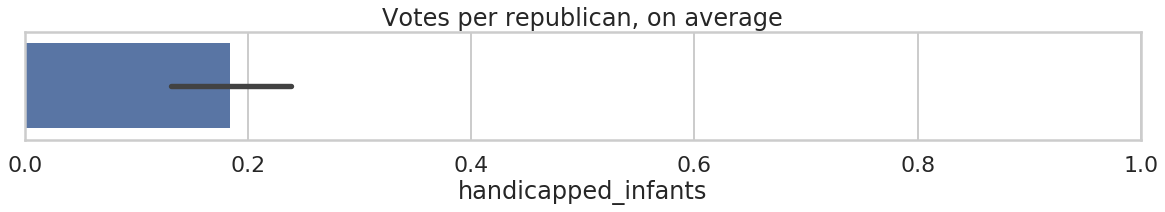

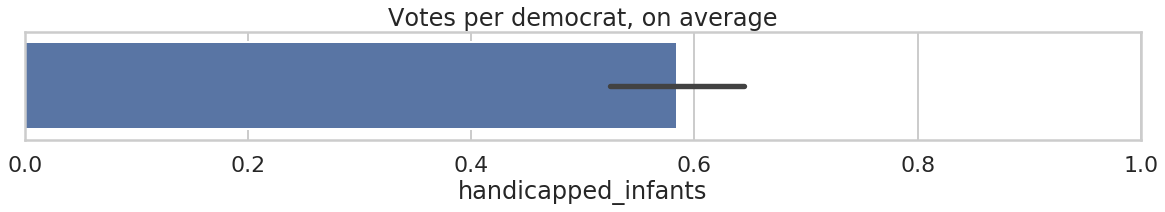

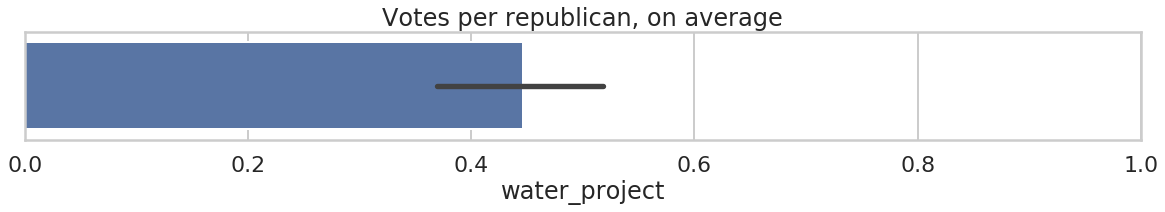

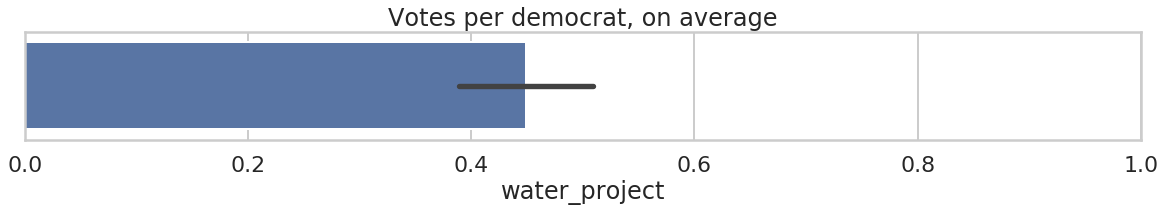

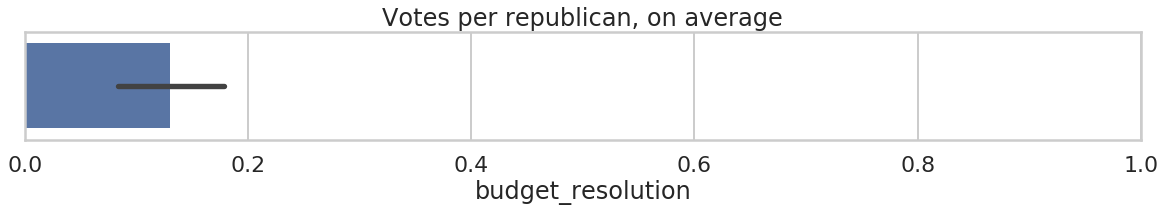

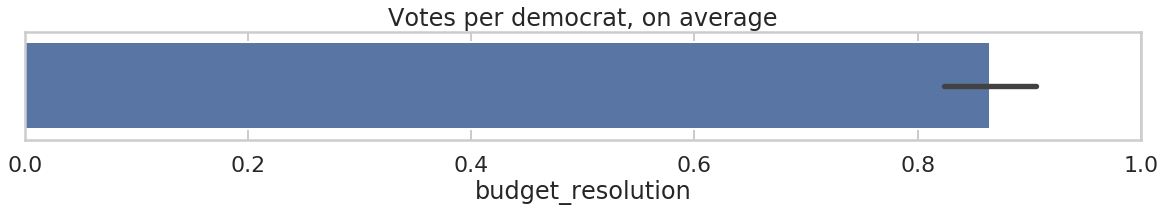

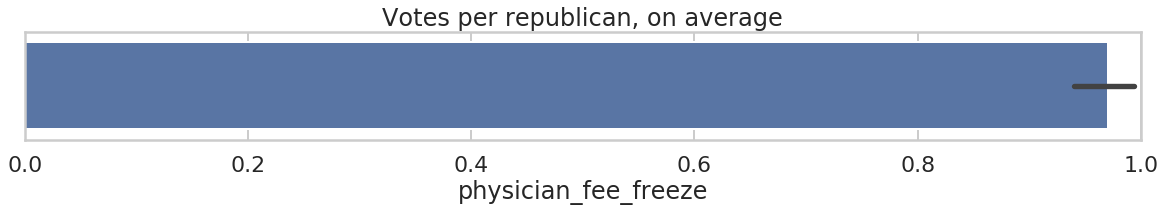

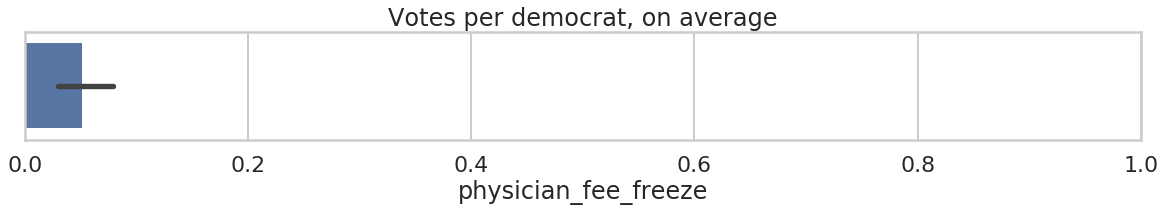

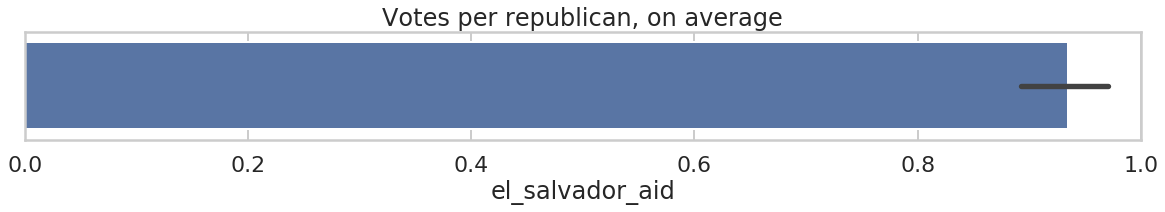

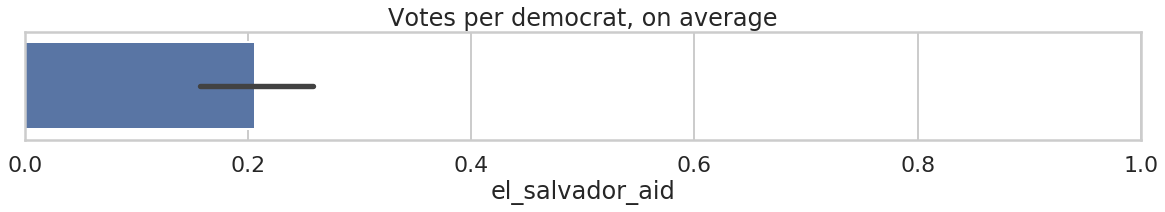

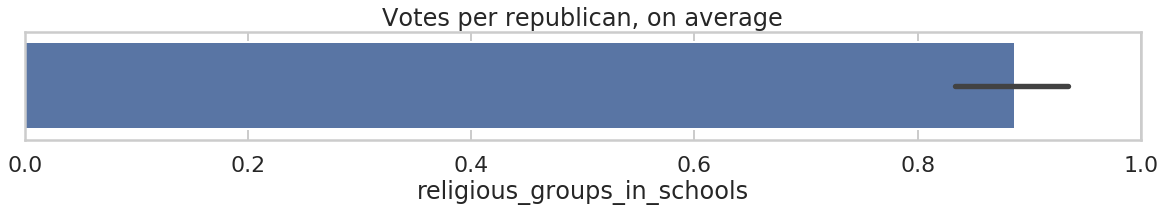

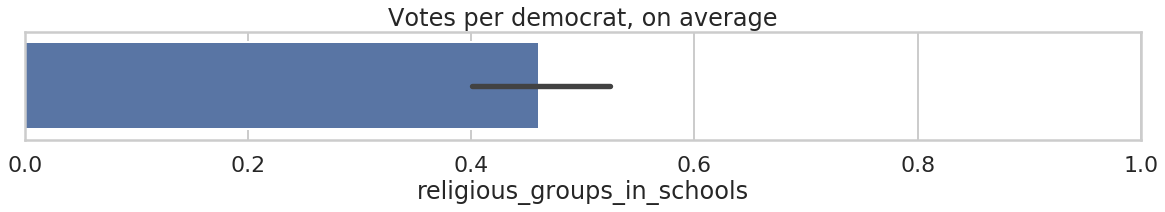

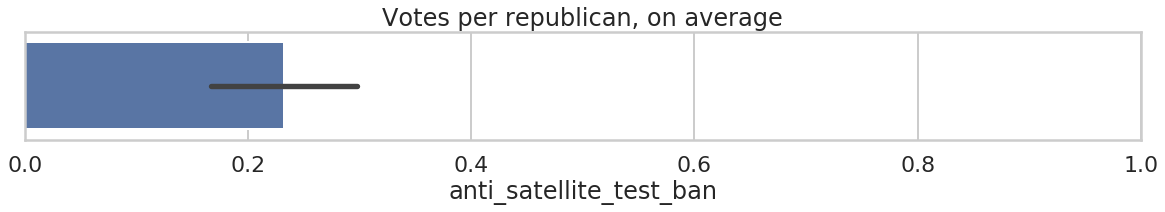

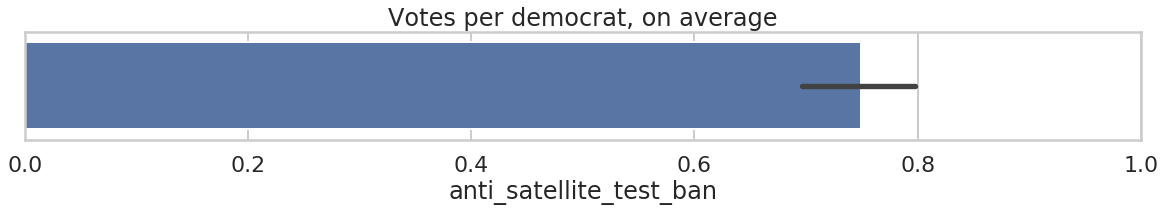

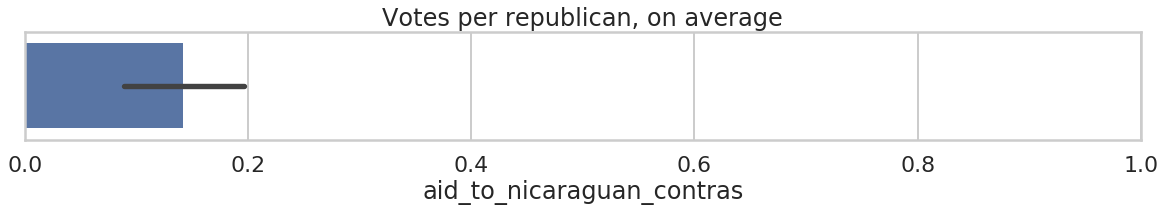

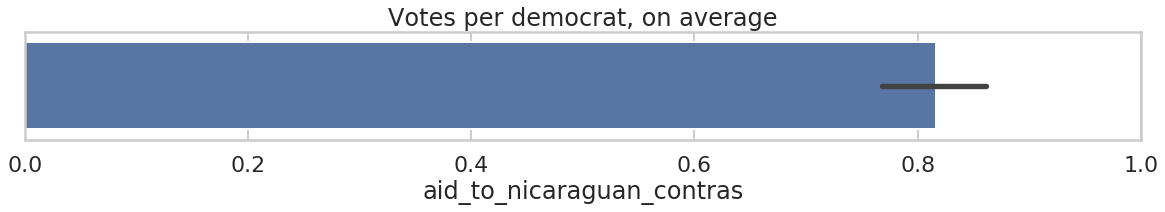

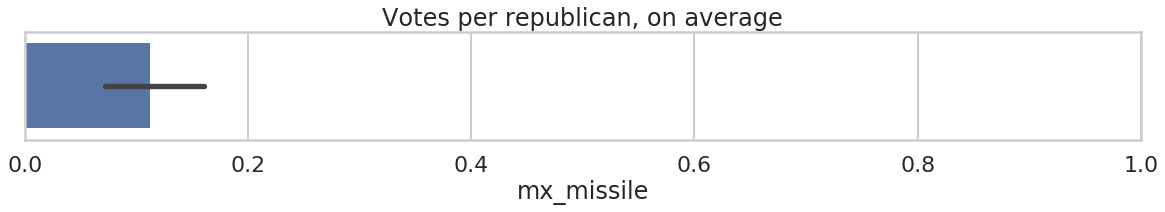

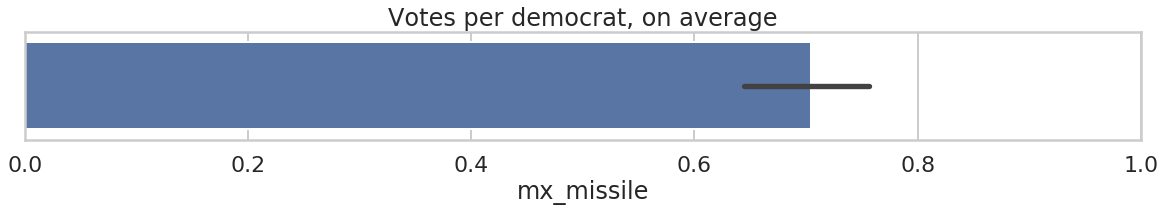

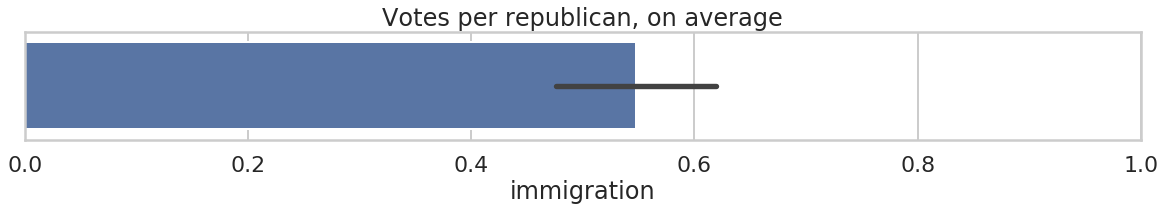

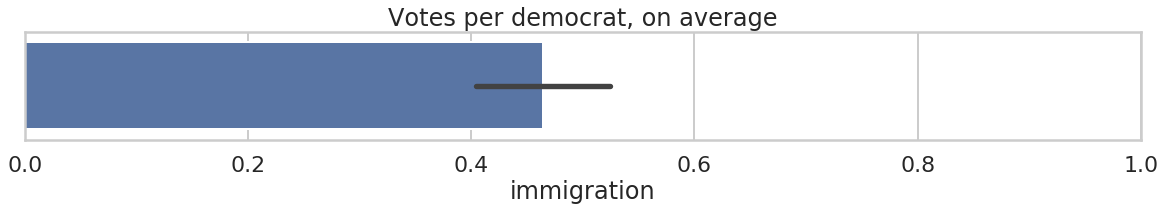

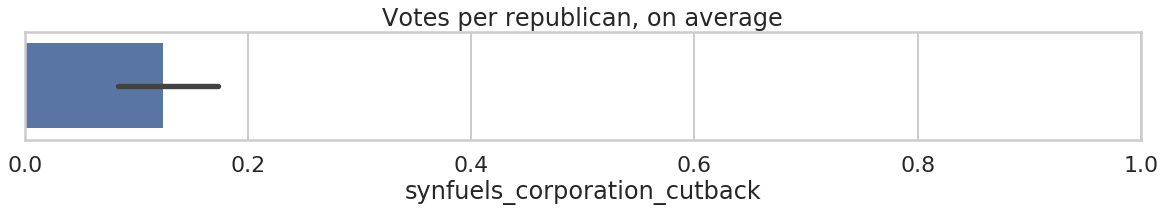

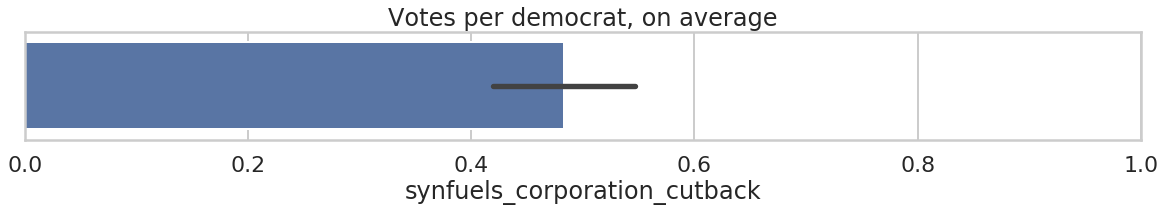

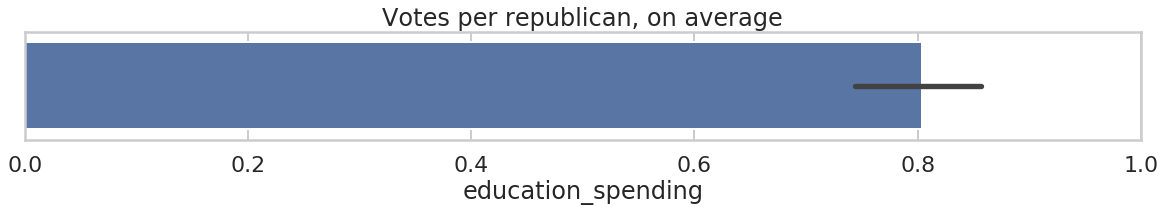

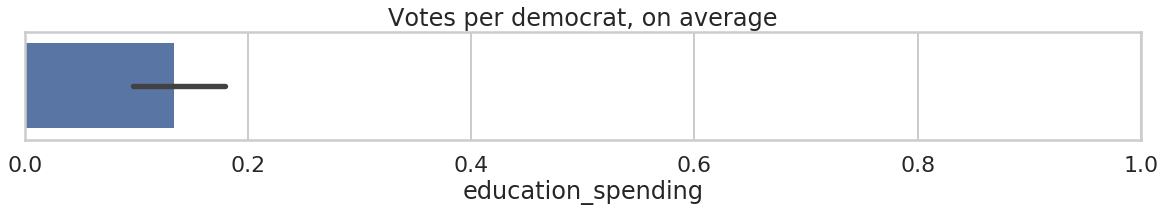

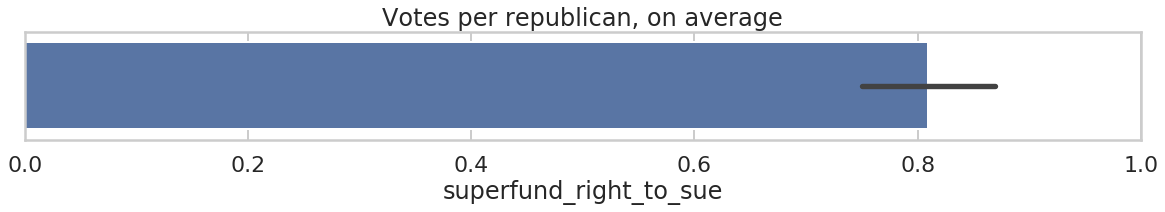

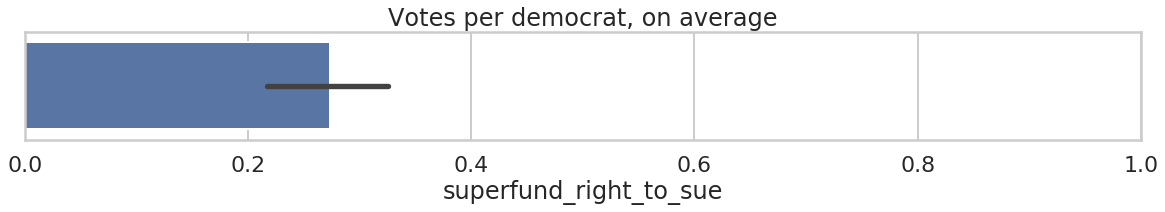

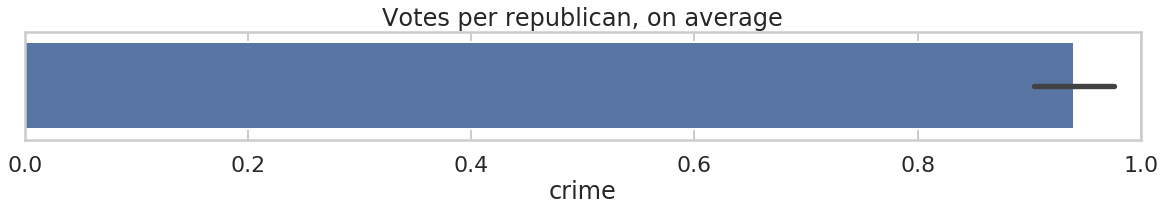

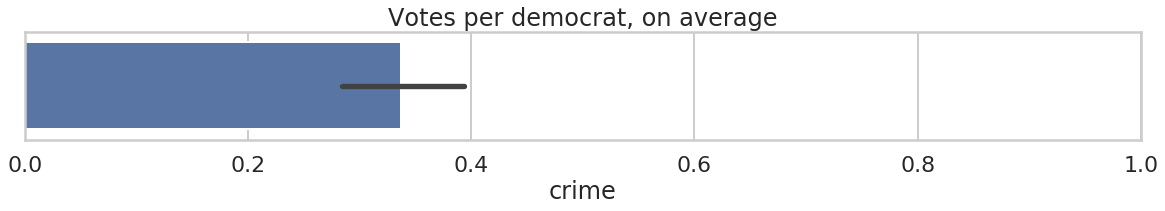

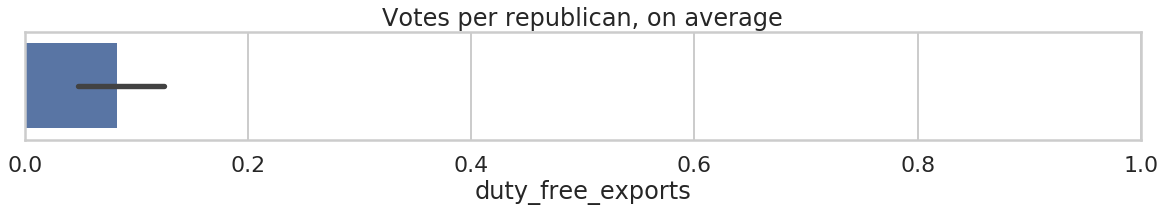

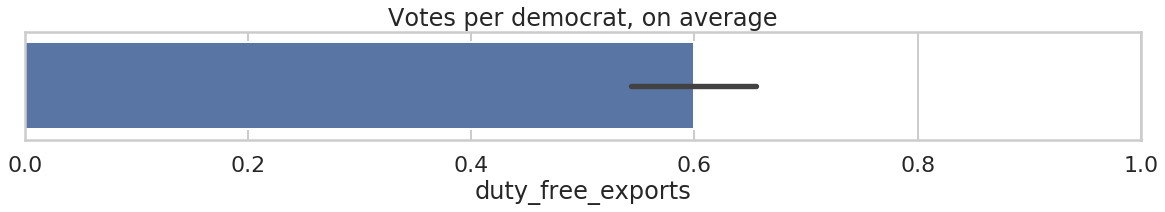

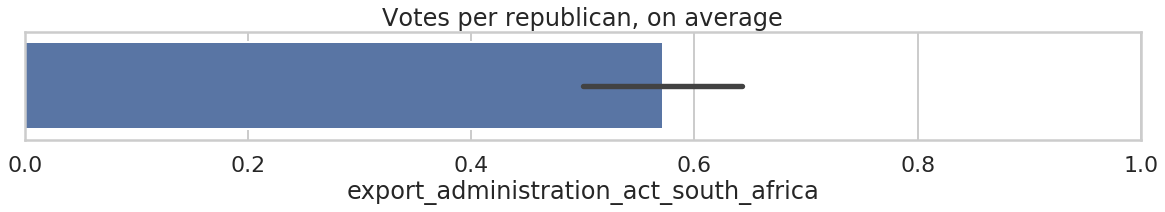

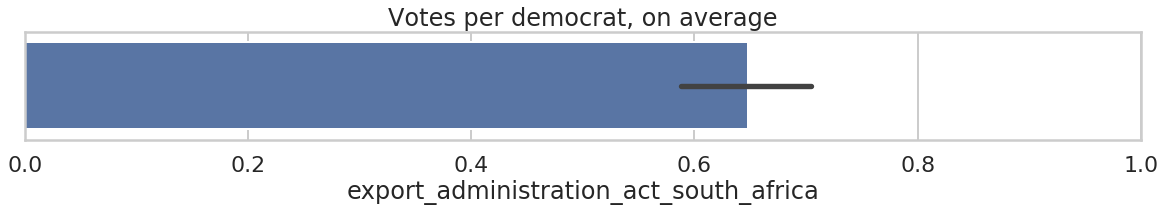

In [13]:
# Confidence Intervals:
#2 Graphically (with a plot) represent the confidence interval

for issue in issues: # calling the function for each issue  

    sns.set(style="whitegrid")
    sns.set_context('poster')
    plt.figure(figsize=(20, 2))
    plt.xlim(0, 1)
    plt.title('Votes per republican, on average')
    sns.barplot(df_republican[issue], ci=95)

    plt.figure(figsize=(20, 2))
    plt.xlim(0, 1)
    plt.title('Votes per democrat, on average')
    sns.barplot(df_democrat[issue], ci=95);


In [0]:
# Confidence Intervals:
#3 Interpret the confidence interval - what does it tell you about the data and its distribution?

In [0]:
# Chi-squared tests:
#4 Take a dataset that we have used in the past in class that has categorical variables. 
# Pick two of those categorical variables and run a chi-squared tests on that data
# By hand using Numpy
# In a single line using Scipy

In [16]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data
  

63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1
57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,0
56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,0
56.0,1.0,3.0,130.0,256.0,1.0,2.0,142.0,1.0,0.6,2.0,1.0,6.0,2
44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,0
52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,0
57.0,1.0,3.0,150.0,168.0,0.0,0.0,174.0,0.0,1.6,1.0,0.0,3.0,0
48.0,1.0,2.0,110.0,229.0

In [17]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data
  

--2019-10-05 05:07:00--  https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18461 (18K) [application/x-httpd-php]
Saving to: ‘processed.cleveland.data’

processed.cleveland 100%[===================>]  18.03K  --.-KB/s    in 0.06s   

2019-10-05 05:07:00 (292 KB/s) - ‘processed.cleveland.data’ saved [18461/18461]



In [18]:
column_headers =  ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','can','thal','num']
heart_data = pd.read_csv("processed.cleveland.data", names=column_headers)
heart_data = heart_data.replace(" ?", np.NaN)
heart_data.sample(10)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,can,thal,num
269,42.0,1.0,3.0,130.0,180.0,0.0,0.0,150.0,0.0,0.0,1.0,0.0,3.0,0
143,64.0,1.0,3.0,125.0,309.0,0.0,0.0,131.0,1.0,1.8,2.0,0.0,7.0,1
209,62.0,0.0,4.0,150.0,244.0,0.0,0.0,154.0,1.0,1.4,2.0,0.0,3.0,1
204,43.0,1.0,4.0,110.0,211.0,0.0,0.0,161.0,0.0,0.0,1.0,0.0,7.0,0
110,61.0,0.0,4.0,145.0,307.0,0.0,2.0,146.0,1.0,1.0,2.0,0.0,7.0,1
114,62.0,0.0,3.0,130.0,263.0,0.0,0.0,97.0,0.0,1.2,2.0,1.0,7.0,2
98,52.0,1.0,2.0,134.0,201.0,0.0,0.0,158.0,0.0,0.8,1.0,1.0,3.0,0
12,56.0,1.0,3.0,130.0,256.0,1.0,2.0,142.0,1.0,0.6,2.0,1.0,6.0,2
102,57.0,0.0,4.0,128.0,303.0,0.0,2.0,159.0,0.0,0.0,1.0,1.0,3.0,0
95,52.0,1.0,4.0,128.0,255.0,0.0,0.0,161.0,1.0,0.0,1.0,1.0,7.0,1


In [19]:
heart_data.shape


(303, 14)

In [20]:
heart_data.count()


age         303
sex         303
cp          303
trestbps    303
chol        303
fbs         303
restecg     303
thalach     303
exang       303
oldpeak     303
slope       303
can         303
thal        303
num         303
dtype: int64

In [21]:
heart_data.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
can         0
thal        0
num         0
dtype: int64

In [22]:
heart_data.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [23]:
cut_points = [126,200,239,240]
label_names = ['126-200','201-239','240+']
heart_data['cholesterol_milligrams_per_deciliter'] = pd.cut(heart_data['chol'], cut_points, labels=label_names)
heart_data['cholesterol_milligrams_per_deciliter'].value_counts()


201-239    97
126-200    49
240+        4
Name: cholesterol_milligrams_per_deciliter, dtype: int64

In [24]:
heart_data['sex'].value_counts() # 1 = male; 0 = female


1.0    206
0.0     97
Name: sex, dtype: int64

In [0]:
# Chi-squared tests:
# By hand using Numpy

In [26]:
heart_data = heart_data.sort_values(by='cholesterol_milligrams_per_deciliter')
contingency_table = pd.crosstab(heart_data['sex'], heart_data['cholesterol_milligrams_per_deciliter'], margins=True)
contingency_table


cholesterol_milligrams_per_deciliter,126-200,201-239,240+,All
sex,,,,
0.0,14,24,1,39
1.0,35,73,3,111
All,49,97,4,150


In [27]:
# Expected Values 
row_sums = contingency_table.iloc[0:2, 3].values
col_sums = contingency_table.iloc[2, 0:3].values

print(row_sums)
print(col_sums)


[ 39 111]
[49 97  4]


In [28]:
total = contingency_table.loc['All','All']
total


150

In [29]:
expected = []
for row_sum in row_sums:
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sum/total
    expected_row.append(expected_val)
  expected.append(expected_row)
  
expected = np.array(expected)
print(expected.shape)
print(expected)


(2, 3)
[[12.74 25.22  1.04]
 [36.26 71.78  2.96]]


In [30]:
# Observed Values 
observed = pd.crosstab(heart_data['sex'], heart_data['cholesterol_milligrams_per_deciliter']).values
print(observed.shape)
observed


(2, 3)


array([[14, 24,  1],
       [35, 73,  3]])

In [31]:
chi_square = ((observed - expected)**2/(expected)).sum()
chi_square

0.2502304048695798

In [32]:
# Chi-squared tests:
# In a single line using Scipy
from scipy import stats
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)
print(chi_squared, p_value, dof, expected)


0.2502304048695798 0.8823952426485716 2 [[12.74 25.22  1.04]
 [36.26 71.78  2.96]]


Null Hypothesis: Higher levels of cholesterol is independent of sex.

Due to a p-value of 0.88, we fail to reject the null hypothesis that higher levels of cholesterol is independent of sex, and conclude that there is no association between higher levels of cholesterol and sex.


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

The item 3 was already done above


## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)